In [57]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [69]:
start_plot = True
wvl_max = 50
wvl_min = 12.5
freq_min = 1/wvl_max
freq_max = 1/wvl_min
nfreq = 5000
fcen = (freq_min + freq_max)/2
df = (freq_max - freq_min)
dfp = 2/3

In [70]:
dpml = np.floor(0.5*wvl_max)+1

dA = 2
dB = 3
epsilonA = 12
epsilonB = 3

NAB = 5
NBA = 5

sz = 4*dpml+(dA+dB)*(NAB+NBA)

resolution = 50 # pixels/μm

cell_size = mp.Vector3(z=sz)

pml_layers = [mp.PML(thickness=dpml)]
source_z = -0.5*sz+dpml
flux_z = 0.5*sz-dpml
pt = mp.Vector3(z=flux_z-0.5)

In [71]:
def BlockP(geometry, ep, d, start_p, N):
    for i in range(N):
        geometry.append(mp.Block(mp.Vector3(mp.inf,mp.inf,d[0]),
                                 center = mp.Vector3(z=start_p + d[0]/2),
                                 material = mp.Medium(epsilon=ep[0])))
        start_p = start_p + d[0]
        geometry.append(mp.Block(mp.Vector3(mp.inf,mp.inf,d[1]),
                                 center = mp.Vector3(z=start_p + d[1]/2),
                                 material = mp.Medium(epsilon=ep[1])))
        start_p = start_p + d[1]
    return geometry              

In [72]:
geometry = BlockP([], [epsilonA,epsilonB], [dA,dB], -(dA+dB)*NAB, N=NAB)
geometry = BlockP(geometry, [epsilonB,epsilonA], [dB,dA], 0, N=NBA)

In [73]:
sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ex,
                     center=mp.Vector3(z=source_z),
                     size=mp.Vector3(mp.inf, mp.inf, 0))]

In [74]:
sim_vac = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    dimensions=1,
                    sources=sources)
tran_fr = mp.FluxRegion(center=mp.Vector3(z=flux_z))
tran = sim_vac.add_flux(fcen, df*dfp, nfreq, tran_fr)

In [75]:
sim_vac.run(until_after_sources=mp.stop_when_fields_decayed(500,mp.Ex,pt,1e-3))
vac_flux = mp.get_fluxes(tran)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00396204 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 154 with resolution 50
time for set_epsilon = 0.00497603 s
-----------
field decay(t = 500.01): 0.2500024467704659 / 0.2500024467704659 = 1.0
field decay(t = 1000.02): 6.101374605713671e-12 / 0.2500024467704659 = 2.4405259566581402e-11
run 0 finished at t = 1000.02 (100002 timesteps)


In [76]:
sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    sources=sources,
                    dimensions=1,
                    geometry=geometry)
tran = sim.add_flux(fcen, df*dfp, nfreq, tran_fr)

In [77]:
sim.run(until_after_sources=mp.stop_when_fields_decayed(500,mp.Ex,pt,1e-3))

-----------
Initializing structure...
time for choose_chunkdivision = 0.000878096 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 154 with resolution 50
     block, center = (0,0,-24)
          size (1e+20,1e+20,2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,0,-21.5)
          size (1e+20,1e+20,3)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3,3,3)
     block, center = (0,0,-19)
          size (1e+20,1e+20,2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,0,-16.5)
          size (1e+20,1e+20,3)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3,3,3)
     block, center = (0,0,-14)
          size (1e+20,1e+20,2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,

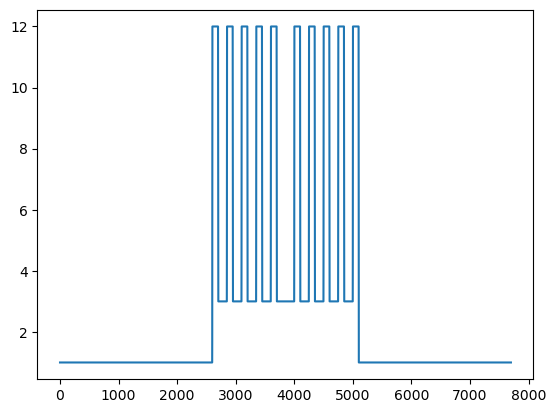

In [86]:
ex_data = sim.get_array(component=mp.Dielectric,center=mp.Vector3(),size=mp.Vector3(z=sz))
plt.plot(ex_data)
plt.show()

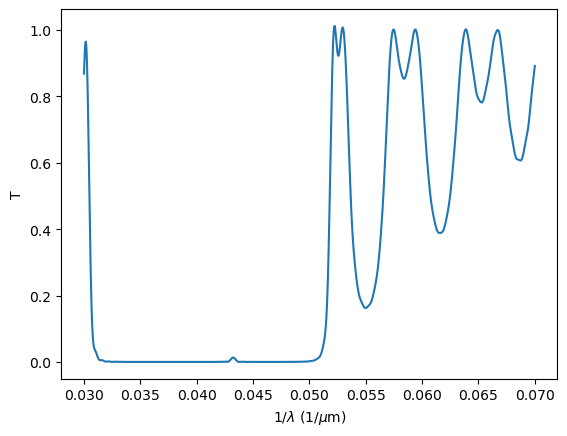

In [85]:
tran_flux = mp.get_fluxes(tran)
flux_freqs = mp.get_flux_freqs(tran)
tran_flux = np.array(tran_flux)
vac_flux = np.array(vac_flux)
plt.plot(flux_freqs, tran_flux/vac_flux)
plt.xlabel("$1/\lambda$ ($1/\mu$m)")
plt.ylabel("T")
plt.show()